In [1]:
import random

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
import numpy as np

In [2]:
from attacksplitnn.attack import fsha
from attacksplitnn.attack import fshamnist
from attacksplitnn.utils import DataSet

In [3]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

X_train = np.array(trainset.data)
y_train = np.array(trainset.targets)

X_test = np.array(testset.data)
y_test = np.array(testset.targets)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#public_idx = random.sample(list(np.where(y_train == 3)[0]) + list(np.where(y_train == 7)[0]), k=15)
#private_idx = random.sample(list(np.where(y_test == 3)[0]) + list(np.where(y_test == 7)[0]), k=15)
public_idx = random.sample(list(range(y_train.shape[0])), k=5)
private_idx = random.sample(list(range(y_test.shape[0])), k=5)

X_public = X_train[public_idx]
y_public = y_train[public_idx]
X_private = X_test[private_idx]
y_private = y_test[private_idx]

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(0.1307, 0.3081)])

publicset = DataSet(X_public, y_public, transform=transform)
publicloader = torch.utils.data.DataLoader(publicset, batch_size=64, shuffle=True, num_workers=1)

privateset = DataSet(X_private, y_private, transform=transform)
privateloader = torch.utils.data.DataLoader(privateset, batch_size=64, shuffle=True, num_workers=1)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
f = fshamnist.Resnet(level=4)
tilde_f = fshamnist.Pilot(level=4)
decoder = fshamnist.Decoder(input_dim=256, level=4)
D = fshamnist.Discriminator(level=4)

optimizers = [optim.Adam, optim.Adam, optim.Adam]

In [5]:
attacker = fsha.FSHA(privateloader, publicloader,
            f, tilde_f, D, decoder,
            optimizers, wgan=True, gradient_penalty=500)

In [6]:
attacker.train(epochs=1000, verbose=100)

f_loss:0.005068108439445496 tilde_f_loss:1.1546870470046997 D_loss:0.01065417006611824 loss_c:1.1250710487365723
f_loss:5.013367652893066 tilde_f_loss:1.0803743600845337 D_loss:-4.099654674530029 loss_c:1.0937548875808716
f_loss:60393.16796875 tilde_f_loss:0.6514196395874023 D_loss:-38298.3125 loss_c:1.0651750564575195
f_loss:96157440.0 tilde_f_loss:0.49212294816970825 D_loss:-49874488.0 loss_c:0.9537724852561951
f_loss:126205009920.0 tilde_f_loss:0.4201599955558777 D_loss:-93770481664.0 loss_c:0.8659071922302246
f_loss:11803507556352.0 tilde_f_loss:0.38544848561286926 D_loss:-10364171321344.0 loss_c:0.8833448886871338
f_loss:693528904597504.0 tilde_f_loss:0.3686276972293854 D_loss:-669176775573504.0 loss_c:0.8721849322319031
f_loss:1.004304550854656e+16 tilde_f_loss:0.3587910234928131 D_loss:-9806011632189440.0 loss_c:0.885931670665741
f_loss:8.140029895796326e+16 tilde_f_loss:0.3530732989311218 D_loss:-8.02609214437458e+16 loss_c:0.9122573733329773
f_loss:7.713390865636393e+17 tilde_

{'f_loss': [], 'tilde_f_loss': [], 'D_loss': [], 'loss_c_verification': []}

In [7]:
for (x_private, label_private), (x_public, label_public) in\
                    zip(privateloader, publicloader):
    break;

x_recovered, control = attacker.attack(x_private)

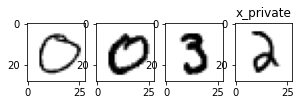

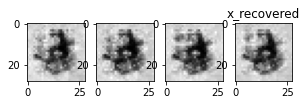

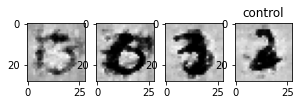

In [8]:
for i in range(1,5): 
    plt.subplot(1,5,i) # 横並びに表示するためのおまじない
    plt.imshow(x_private[i-1].reshape(28,28),cmap='gray_r')
plt.title("x_private")
plt.show()

for i in range(1,5): 
    plt.subplot(1,5,i) # 横並びに表示するためのおまじない
    plt.imshow(x_recovered[i-1].reshape(28,28),cmap='gray_r')
plt.title("x_recovered")
plt.show()

for i in range(1,5): 
    plt.subplot(1,5,i) # 横並びに表示するためのおまじない
    plt.imshow(control[i-1].reshape(28,28),cmap='gray_r')
plt.title("control")
plt.show()